In [1]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

In [2]:
g = 10
L = 1
tau = 2 * np.sqrt(L / g)
A0 = 1.1

In [11]:
def fun(t, y):
    dy0_dt = y[1]
    dy1_dt = 2 / tau * (1 - A0 * np.cos(y[0]) ** 2) * y[1] - np.sin(y[0]) / (tau ** 2)
    dy2_dt = -y[2] / tau + (y[2] * A0 / tau) * np.cos(y[0]) ** 2
    dy_dt = np.hstack((dy0_dt, dy1_dt, dy2_dt))
    return dy_dt


phi_0 = np.deg2rad(10)
omega_0 = 1

sol = si.solve_ivp(
    fun,
    t_span=[0, 2 * np.pi / 10],
    y0=[phi_0, omega_0, L],
    dense_output=True,
    vectorized=True,
)

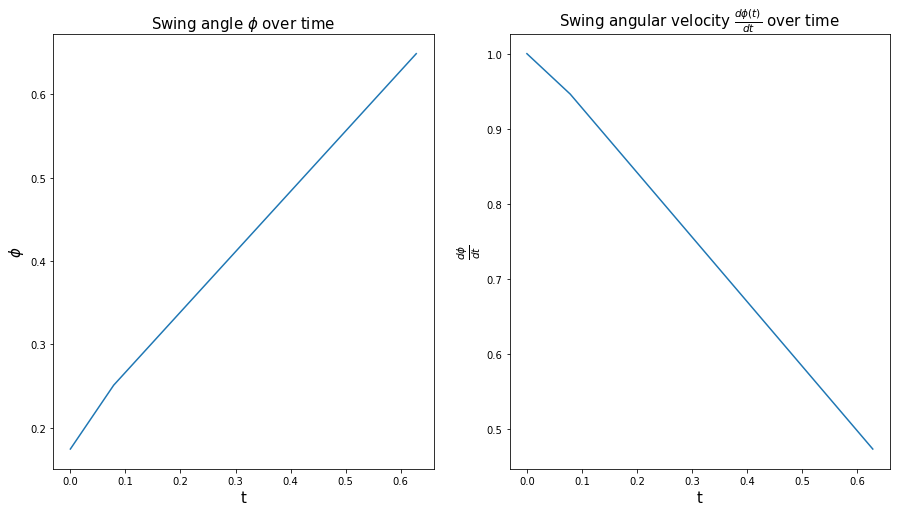

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(sol.t, sol.y[0])
ax[0].set_title(r"Swing angle $\phi$ over time", fontsize=15)
ax[0].set_xlabel("t", fontsize=15)
ax[0].set_ylabel(r"$\phi$", fontsize=15)

ax[1].plot(sol.t, sol.y[1])
ax[1].set_title(r"Swing angular velocity $\frac{d\phi(t)}{dt}$ over time", fontsize=15)
ax[1].set_xlabel("t", fontsize=15)
ax[1].set_ylabel(r"$\frac{d\phi}{dt}$", fontsize=15)

plt.show()

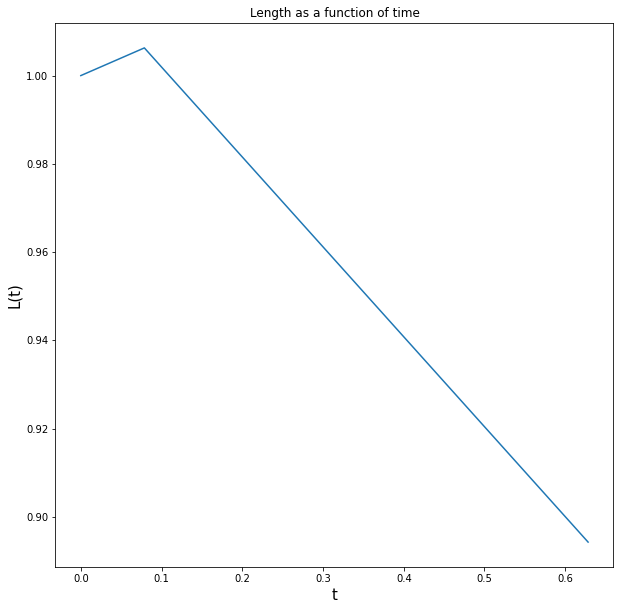

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(sol.t, sol.y[2])
plt.xlabel("t", fontsize=15)
plt.ylabel("L(t)", fontsize=15)
plt.title("Length as a function of time")
plt.show()